# Google Search Console API (With Python)
author:    Jean-Christophe Chouinard

Role:      Sr. SEO Specialist at SEEK.com.au

Website:   jcchouinard.com

LinkedIn:  linkedin.com/in/jeanchristophechouinard/ 

Twitter:   twitter.com/@ChouinardJC

## Why Use The Google Search Console API?

Google limits the amount of data they report to the user. 

In the search performance report, you can only see **1000 rows** and **16 months** of data.

With GSC UI, it is also not possible to get **keywords per page** as they are reported in separate pages.

The Google Search Console API lets you extract a lot more than 1000 rows of data.

## Get Started
### Clone Github Repository
`$ git clone https://github.com/jcchouinard/GoogleSearchConsole-Tutorial.git`

### Install Requirements
`pip install -r requirements.txt`

### Learn Python for SEO
[jcchouinard.com/python-for-seo](https://www.jcchouinard.com/python-for-seo)

### Get API Keys
[jcchouinard.com/how-to-get-google-search-console-api-keys/](https://www.jcchouinard.com/how-to-get-google-search-console-api-keys/)

### How to format your request
[jcchouinard.com/what-is-google-search-console-api/](https://www.jcchouinard.com/what-is-google-search-console-api/)

In [1]:
site = 'https://www.jcchouinard.com'
creds = 'client_secrets.json'
output = 'gsc_data.csv'
start_date = '2020-07-15' 
end_date = '2020-07-25' # Default 3 days before today

## Authorize Your Credentials

In [2]:
from oauth import authorize_creds

webmasters_service = authorize_creds(creds) 

Authorizing Creds
Auth Successful


## Extract GSC Data by URL

In [ ]:
from gsc_by_url import gsc_by_url

list_of_urls = [
    '/chrome-devtools-commands-for-seo/',
    '/learn-selenium-python-seo-automation/'
    ]

list_of_urls = [site + x for x in list_of_urls]
args = webmasters_service,site,list_of_urls,creds,start_date,end_date

gsc_by_url(*args)

## Extract Filtered Data from Google Search Console

Possible combinations:

Dimension: query, page.

Operator: contains, equals, notEquals, notContains


In [ ]:
from gsc_with_filters import gsc_with_filters

# Filters
dimension = 'query' 
operator = 'contains'
expression = 'python'
args = webmasters_service,site,creds,dimension,operator,expression,start_date,end_date

gsc_with_filters(*args)

## Extract 100% of the data from Google Search Console

What the script does?

1. Creates an output folder if it does not exist using my site.

2. Checks output folder if dates are already extracted.

3. Dates that are already extracted are skipped.

4. Day by day, it requests lines by batch of 25K.

5. It iterates until all lines are extracted for that day.

6. New dates are appended to the existing CSV

In [ ]:
from gsc_to_csv_by_month import gsc_to_csv

args = webmasters_service,site,output,creds,start_date
gsc_to_csv(*args,end_date=end_date)

### Extract up to the Latest Available Date
Leave `end_date` empty to extract up to the latest possible date. By default `end_date` is set to three days in the past.

In [3]:
from gsc_to_csv_by_month import gsc_to_csv

args = webmasters_service,site,output,creds,start_date
gsc_to_csv(*args)

gsc_to_csv gz: False
Create project: www_jcchouinard_com
Checking CSVs in www_jcchouinard_com/
No CSV to read
Done extracting DF from CSVs
Start date at beginning: 2020-07-15 00:00:00
date = 2020-07-15
successful at 0
Numrows at the start of loop: 0
Numrows at the end of loop: 4446
Start date at beginning: 2020-07-16 00:00:00
date = 2020-07-16
successful at 0
Numrows at the start of loop: 0
Numrows at the end of loop: 4313
Start date at beginning: 2020-07-17 00:00:00
date = 2020-07-17
successful at 0
Numrows at the start of loop: 0
Numrows at the end of loop: 4102
Start date at beginning: 2020-07-18 00:00:00
date = 2020-07-18
successful at 0
Numrows at the start of loop: 0
Numrows at the end of loop: 3711
Start date at beginning: 2020-07-19 00:00:00
date = 2020-07-19
successful at 0
Numrows at the start of loop: 0
Numrows at the end of loop: 3920
Start date at beginning: 2020-07-20 00:00:00
date = 2020-07-20
successful at 0
Numrows at the start of loop: 0
Numrows at the end of loop: 45

### Enable Compression with the Optional gz Parameter
By default `gz` is set to `False`.

In [ ]:
from gsc_to_csv_by_month import gsc_to_csv

start_date = '2020-07-15' 
end_date = '2020-07-25' 
args = webmasters_service,site,output,creds,start_date
gsc_to_csv(*args,end_date=end_date,gz=True)

## SEO Analysis

## Branded VS Non-Branded

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
from file_manip import csvs_to_df

site = 'https://www.jcchouinard.com'
filename = 'gsc_data.csv'

df = csvs_to_df(site,filename,start_date,gz=False)
print(df.shape)
df.head()

Checking CSVs in www_jcchouinard_com/
Checking 2020-07_gsc_data.csv
Checking 2020-08_gsc_data.csv
Reading www_jcchouinard_com/2020-07_gsc_data.csv to CSV
Reading www_jcchouinard_com/2020-08_gsc_data.csv to CSV
Done extracting DF from CSVs
(162441, 7)


,date,page,query,clicks,ctr,impressions,position
0,2020-07-15,https://www.jcchouinard.com/clone-github-repos...,how to clone git repository in windows,16,80.000000,20,1.00
1,2020-07-15,https://www.jcchouinard.com/clone-github-repos...,how to clone a repo,3,21.428571,14,7.79
2,2020-07-15,https://www.jcchouinard.com/google-analytics-a...,google analytics python,3,27.272727,11,6.00
3,2020-07-15,https://www.jcchouinard.com/python-automation-...,automate python script to run daily,3,42.857143,7,1.57
4,2020-07-15,https://www.jcchouinard.com/python-automation-...,schedule python script,3,13.636364,22,2.41


In [66]:
r = r'.*python.*'
df['query_type'] = ''
df['query_type'][df['query'].str.contains(r,regex=True)] = 'Python'
df['query_type'][~df['query'].str.contains(r,regex=True)] = 'Not-Python'
df['query_type'].head()

0    Not-Python
1    Not-Python
2    Not-Python
3    Not-Python
4    Not-Python
Name: query_type, dtype: object

In [67]:
df = df.groupby(['date','query_type'])['clicks'].sum().reset_index()
df.head()

,date,query_type,clicks
0,2020-07-15,Not-Python,163
1,2020-07-15,Python,0
2,2020-07-16,Not-Python,185
3,2020-07-17,Not-Python,119
4,2020-07-17,Python,0


In [68]:
df = df.set_index(['date','query_type'])['clicks'].unstack()
df.head()

query_type,Not-Python,Python
date,,
2020-07-15,163.0,0.0
2020-07-16,185.0,NaN
2020-07-17,119.0,0.0
2020-07-18,76.0,0.0
2020-07-19,81.0,NaN


In [69]:
df = df.reset_index().rename_axis(None, axis=1)
df.head()

,date,Not-Python,Python
0,2020-07-15,163.0,0.0
1,2020-07-16,185.0,NaN
2,2020-07-17,119.0,0.0
3,2020-07-18,76.0,0.0
4,2020-07-19,81.0,NaN


In [70]:
from file_manip import date_to_index

df = date_to_index(df,'date')
df.head()

,Not-Python,Python
date,,
2020-07-15,163.0,0.0
2020-07-16,185.0,NaN
2020-07-17,119.0,0.0
2020-07-18,76.0,0.0
2020-07-19,81.0,NaN


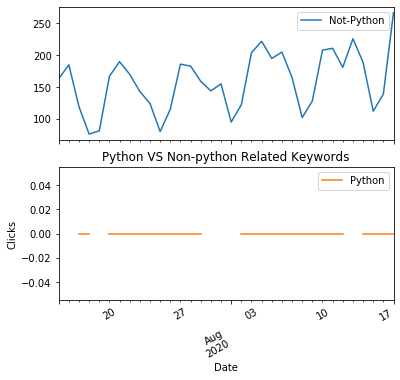

In [71]:
df.plot(subplots=True,
        sharex=True,
        figsize=(6,6))
plt.title('Python VS Non-python Related Keywords')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.show()

## Rankings

In [27]:
df['ranking'] = 'Page 2, Pos 15+'
df['ranking'][df['position'] <= 3] = 'Page 1, Pos 1-3'
df['ranking'][(df['position'] > 3) & (df['position'] <= 7)] = 'Page 1, Pos 4-7'
df['ranking'][(df['position'] > 7) & (df['position'] <= 10)] = 'Page 1, Pos 8-10'
df['ranking'][(df['position'] > 10) & (df['position'] <= 14)] = 'Page 2, Pos 11-14'

### Clicks by position

In [28]:
import plotly.express as px

plot_df = df.groupby(['date','ranking']).agg({'query':'count','clicks':'sum'}).reset_index()

fig = px.area(plot_df, x='date', y='clicks', color='ranking', line_group='ranking', hover_name='ranking',
        line_shape='spline')
fig.show()

### Number of Queries by Position

In [29]:
fig = px.area(plot_df, x='date', y='query', color='ranking', line_group='ranking', hover_name='ranking',
        line_shape='spline')
fig.show()

In [72]:
plot_df = df.groupby(['date']).agg({'query':'count','clicks':'sum'}).reset_index()

fig = px.line(plot_df, x='date', y=['query','clicks'])
fig.show()

SpecificationError: nested renamer is not supported